In [2]:
import numpy as np
import sys,os
import matplotlib.pyplot as plt
from scipy.stats import multivariate_t as mvt, norm 
import sklearn
from sklearn.covariance import GraphicalLasso
import scipy
from sklearn.metrics import zero_one_loss
from sklearn.metrics.pairwise import pairwise_kernels
import time
import tqdm
import networkx as nx

sys.path.insert(0, 'C:/Users/User/Code/DyGraph')

import DyGraph as dg

In [91]:
# Read
import pickle
with open(f'../data/large_scale/ls_gaussian2_block-wise-reconstruction_1000_100.pkl', 'rb') as handle:
    bwr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_element-wise_1000_100.pkl', 'rb') as handle:
    ew = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_global-reconstruction_1000_100.pkl', 'rb') as handle:
    gr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_perturbed-node_1000_100.pkl', 'rb') as handle:
    pn = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian2_ridge_1000_100.pkl', 'rb') as handle:
    ridge = pickle.load(handle)

In [74]:
ds = [5, 10, 20, 50, 80, 100, 150, 300, 1000]

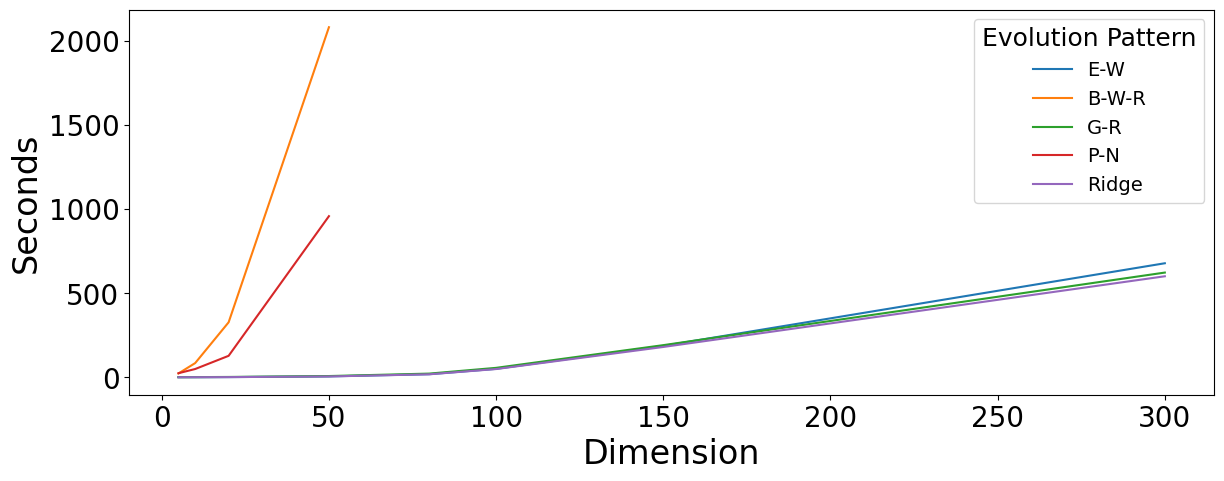

In [109]:
fig, ax = plt.subplots(1,1, figsize = (14,5))

ax.plot(ew['ds'], ew['time_elapsed'], label = "E-W")
ax.plot(bwr['ds'], bwr['time_elapsed'], label = "B-W-R")
ax.plot(gr['ds'], gr['time_elapsed'], label = "G-R")
ax.plot(pn['ds'], pn['time_elapsed'], label = "P-N")
ax.plot(ridge['ds'], ridge['time_elapsed'], label = "Ridge")
legend = ax.legend(title = "Evolution Pattern",fontsize = 14)
legend.get_title().set_fontsize('18')
ax.set_xlabel("Dimension", fontdict = {'fontsize':24})
ax.set_ylabel("Seconds", fontdict = {'fontsize':24})
ax.tick_params(axis='both', which='major', labelsize=20)



In [92]:
ew['time_elapsed']

[1.0118720531463623,
 1.1305031776428223,
 1.6245431900024414,
 5.8453288078308105,
 18.898216009140015,
 50.70661282539368,
 187.2489984035492,
 678.5286686420441]

# complexity kappa

In [89]:
# Read
import pickle
with open(f'../data/large_scale/ls_gaussian_kappa_block-wise-reconstruction_1000_100_0.0001.pkl', 'rb') as handle:
    bwr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_kappa_element-wise_1000_100_0.0001.pkl', 'rb') as handle:
    ew = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_kappa_global-reconstruction_1000_100_0.0001.pkl', 'rb') as handle:
    gr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_kappa_perturbed-node_1000_100_0.0001.pkl', 'rb') as handle:
    pn = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_kappa_ridge_1000_100_0.0001.pkl', 'rb') as handle:
    ridge = pickle.load(handle)

In [96]:
pn['kappa']

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35])

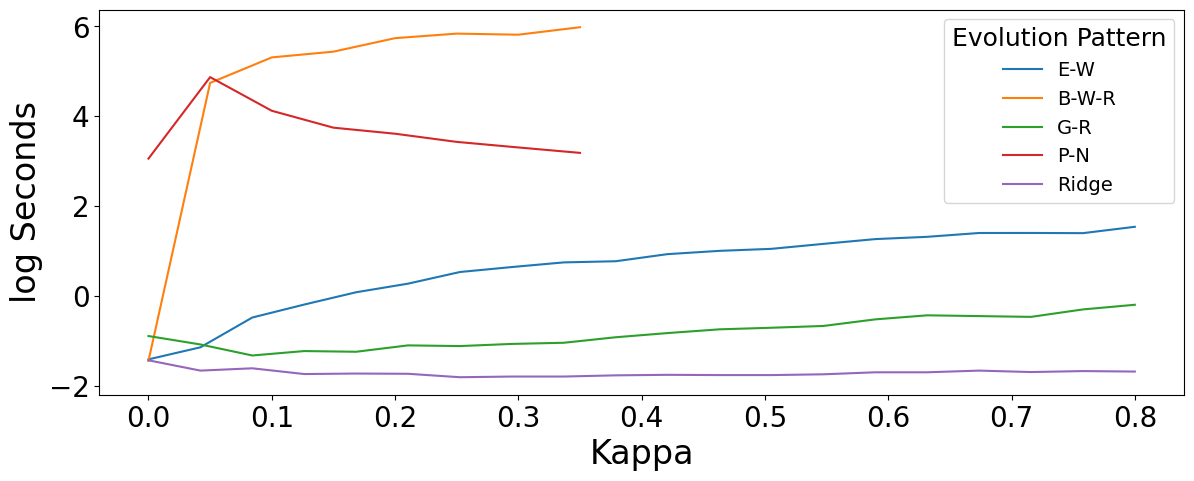

In [100]:
fig, ax = plt.subplots(1,1, figsize = (14,5))

ax.plot(ew['ds'], np.log(ew['time_elapsed']), label = "E-W")
ax.plot(bwr['ds'], np.log(bwr['time_elapsed']), label = "B-W-R")
ax.plot(gr['ds'], np.log(gr['time_elapsed']), label = "G-R")
ax.plot(pn['kappa'], np.log(pn['time_elapsed']), label = "P-N")
ax.plot(ridge['ds'], np.log(ridge['time_elapsed']), label = "Ridge")
legend = ax.legend(title = "Evolution Pattern",fontsize = 14)
legend.get_title().set_fontsize('18')
ax.set_xlabel("Kappa", fontdict = {'fontsize':24})
ax.set_ylabel("log Seconds", fontdict = {'fontsize':24})
ax.tick_params(axis='both', which='major', labelsize=20)


# Alpha

In [106]:
# Read
import pickle
with open(f'../data/large_scale/ls_gaussian_alpha_block-wise-reconstruction_1000_100_0.0001.pkl', 'rb') as handle:
    bwr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_alpha_element-wise_1000_100_0.0001.pkl', 'rb') as handle:
    ew = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_alpha_global-reconstruction_1000_100_0.0001.pkl', 'rb') as handle:
    gr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_alpha_perturbed-node_1000_100_0.0001.pkl', 'rb') as handle:
    pn = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_alpha_ridge_1000_100_0.0001.pkl', 'rb') as handle:
    ridge = pickle.load(handle)

In [108]:
ridge['kappa']

0.1

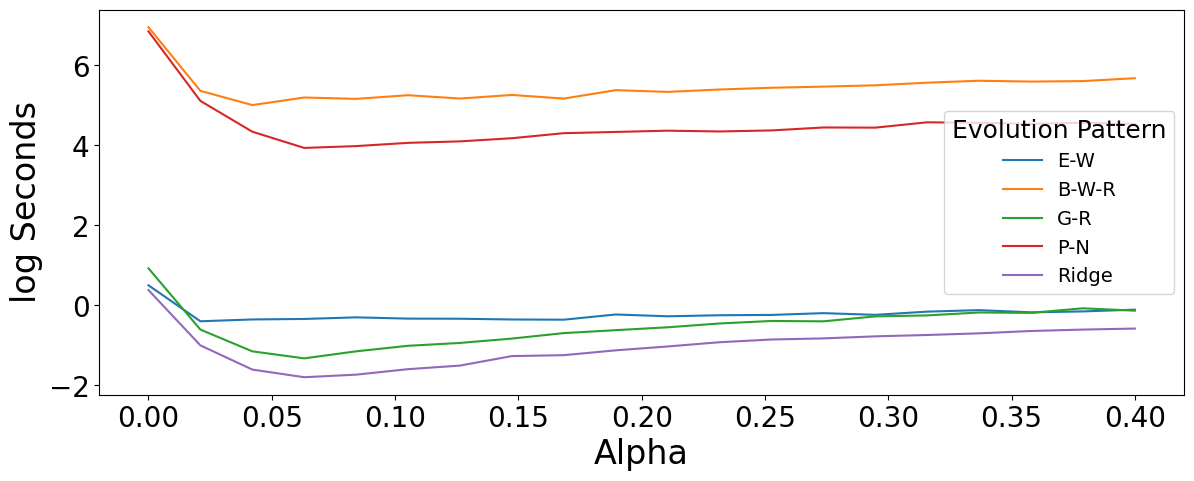

In [102]:
fig, ax = plt.subplots(1,1, figsize = (14,5))

ax.plot(ew['alpha'], np.log(ew['time_elapsed']), label = "E-W")
ax.plot(bwr['alpha'], np.log(bwr['time_elapsed']), label = "B-W-R")
ax.plot(gr['alpha'], np.log(gr['time_elapsed']), label = "G-R")
ax.plot(pn['alpha'], np.log(pn['time_elapsed']), label = "P-N")
ax.plot(ridge['alpha'], np.log(ridge['time_elapsed']), label = "Ridge")
legend = ax.legend(title = "Evolution Pattern",fontsize = 14)
legend.get_title().set_fontsize('18')
ax.set_xlabel("Alpha", fontdict = {'fontsize':24})
ax.set_ylabel("log Seconds", fontdict = {'fontsize':24})
ax.tick_params(axis='both', which='major', labelsize=20)


# Sparsity

In [103]:
# Read
import pickle
with open(f'../data/large_scale/ls_gaussian_density_block-wise-reconstruction_1000_100_0.0001.pkl', 'rb') as handle:
    bwr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_density_element-wise_1000_100_0.0001.pkl', 'rb') as handle:
    ew = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_density_global-reconstruction_1000_100_0.0001.pkl', 'rb') as handle:
    gr = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_density_perturbed-node_1000_100_0.0001.pkl', 'rb') as handle:
    pn = pickle.load(handle)
with open(f'../data/large_scale/ls_gaussian_density_ridge_1000_100_0.0001.pkl', 'rb') as handle:
    ridge = pickle.load(handle)

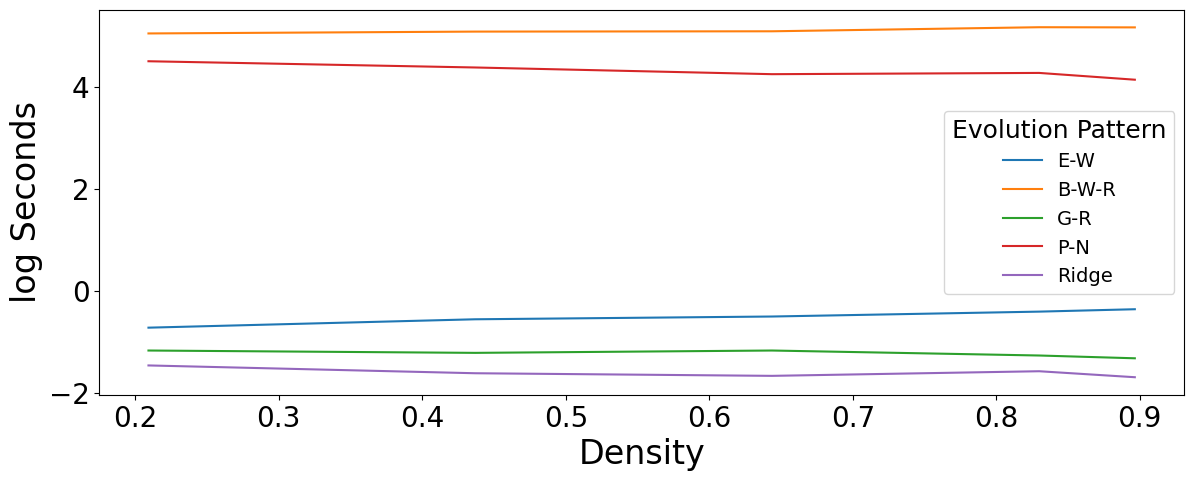

In [105]:
fig, ax = plt.subplots(1,1, figsize = (14,5))

ax.plot(ew['density'], np.log(ew['time_elapsed']), label = "E-W")
ax.plot(bwr['density'], np.log(bwr['time_elapsed']), label = "B-W-R")
ax.plot(gr['density'], np.log(gr['time_elapsed']), label = "G-R")
ax.plot(pn['density'], np.log(pn['time_elapsed']), label = "P-N")
ax.plot(ridge['density'], np.log(ridge['time_elapsed']), label = "Ridge")
legend = ax.legend(title = "Evolution Pattern",fontsize = 14)
legend.get_title().set_fontsize('18')
ax.set_xlabel("Density", fontdict = {'fontsize':24})
ax.set_ylabel("log Seconds", fontdict = {'fontsize':24})
ax.tick_params(axis='both', which='major', labelsize=20)


# Try on financial data

In [70]:
import pickle
with open('price_pivot.pkl', 'rb') as handle:
    price_pivot = pickle.load(handle)

price_pivot = price_pivot.dropna(axis=1)

In [79]:
d = 50
X = np.array(price_pivot[:d])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
S = np.corrcoef(X.T)
cov = GraphicalLasso(alpha=0.5).fit(X)
#np.linalg.eigh(cov.precision_)

c:\Users\User\anaconda3\envs\DyGraph\lib\site-packages\sklearn\covariance\_graph_lasso.py:316: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 2.576e-04
  warnings.warn(


In [83]:
from sklearn.covariance import LedoitWolf
cov = LedoitWolf().fit(X)
np.linalg.cond(cov.precision_)

485.379439547357

In [86]:
cov.precision_[np.abs(cov.precision_)< 0.03] = 0.0
np.linalg.cond(cov.precision_)

35.389879509087734

In [ ]:
          dg_opt1 = dg.dygl_parallel(obs_per_graph = obs_per_graph, max_iter = max_iter, lamda = obs_per_graph*alpha, kappa = obs_per_graph*d, tol = tol)
            dg_opt1.fit(X, nr_workers=1, temporal_penalty=temporal_penalty, lik_type="gaussian",verbose=True)